In [1]:
include("./mm.jl");


WebIO._IJuliaInit()

In [82]:
function newton(f::Vector{Float64}, x::Float64, debug::Bool=false)
    eps = 1e-7
    fprime = f_prime(f)
    p::Float64 = poly_horner(f, x)
    iterations = 1
    MAX = max(10*length(f), 50)
    if debug
        println("#:0, x:$x, p:$p")
    end
    # 
    while abs(p) > eps && iterations < MAX
        x = x - p / poly_horner(fprime, x)
        p = poly_horner(f, x)
        if debug
            println("#:$iterations, x:$x, p:$p")
        end

        iterations += 1
    end
   return x, abs(p) < eps
end

function f_prime(f::Vector{Float64})
    fprime = Vector{Float64}(undef, length(f)-1)
    coeff = length(f)-1
    for i in 1:length(f)-1
        fprime[i] = f[i]*coeff
        coeff -= 1
    end
    return fprime
end

function poly_horner(f::Vector{Float64}, x::Float64)
    p::Float64 = f[1]
    for i in 2:length(f)
        p = p * x + f[i]
    end
    return p
end


poly_horner (generic function with 1 method)

In [9]:
# println(rand(Float64, 500))
# v = [0.6606934403610921, 0.5653821746481771, 0.5682805303605107, 0.06871364805780011, 0.6545803454320889, 0.21064644555023926, 0.8488895652226445, 0.8541864972290713, 0.649860795896392, 0.6290632897781683, 0.6602662534218582, 0.5221360210395749, 0.7566655635871707, 0.1554660517554982, 0.6341446617115434, 0.3913725155198755, 0.1211625193068675, 0.49073069474952935, 0.007520904576063914, 0.859418410227362, 0.29423262323215593, 0.2631666989271664, 0.043486277920231076, 0.7156200079216953, 0.6001033066637792, 0.06875751311807743, 0.143673611557395, 0.8251374261248182, 0.39631106596419186, 0.9235911160750159, 0.08739647495126135, 0.9955319358639962, 0.7746012998959403, 0.9902179979431653, 0.4237272559751739, 0.0870916156436774, 0.145011614933797, 0.7004891673144464, 0.5443304295077019, 0.7362323025610289, 0.8587259291677223, 0.8387287996604403, 0.3693280210731704, 0.8685293054321351, 0.5641158670890841, 0.9524621828220009, 0.5673374784409173, 0.03893715524591812, 0.24401626590986036, 0.24538097160520334, 0.7705979345391946, 0.4503572017997024, 0.32342333408532353, 0.9562754235085158, 0.25676376287833913, 0.012554290770138699, 0.4596675284533538, 0.08841200228814872, 0.9733399055677976, 0.49235814211329654, 0.7480160127244537, 0.7770994814664017, 0.12447132451793508, 0.4856603226552887, 0.9572121639471898, 0.9557857484087716, 0.23790192864666748, 0.46868559888777017, 0.6783029784658573, 0.14460309470043264, 0.4068689279587747, 0.05174562368349067, 0.2053861284423193, 0.38171156998885514, 0.21060358311075533, 0.6475173687546005, 0.8348269093267981, 0.8700893876456202, 0.42418446537528065, 0.5855897457695413, 0.21619272820116064, 0.6448856262809133, 0.8781036916025795, 0.7983667282481289, 0.38331578182173975, 0.24826432377059127, 0.6914921169070923, 0.663622596039754, 0.7782704255993274, 0.45135524227143065, 0.2454318498157736, 0.2630609068106997, 0.7283048182627692, 0.9077088619708142, 0.45215098231727635, 0.5731749805335145, 0.7158361280593112, 0.1396844083395269, 0.04050914275987172, 0.22604600730172864, 0.5414663083017006, 0.5088678202802391, 0.07890383384996136, 0.33731853319858174, 0.9961539091858943, 0.39338737510172805, 0.9125710907481217, 0.23399187006311095, 0.2236419381520851, 0.03711740411143982, 0.4136942440292004, 0.9697618189927102, 0.35002071766061316, 0.6932658919142889, 0.05456208244741534, 0.5290251796872407, 0.3229905657239067, 0.2085646488664613, 0.1695406701575881, 0.7807750501700566, 0.6997483985143347, 0.2376893934998805, 0.3475093275826934, 0.3577061537809959, 0.9677347786277081, 0.09149032290250714, 0.11748847671678153, 0.5819219361849299, 0.338426887144179, 0.453526675176692, 0.7258565421544502, 0.8042558215280851, 0.9398398335994214, 0.40974167910118664, 0.7538466531631547, 0.31870233711387297, 0.6523576448100628, 0.7926746156503556, 0.5736393599110581, 0.3175523691624669, 0.8782187878700615, 0.6243635753474049, 0.05860492361737679, 0.5406263792278143, 0.8212786442221716, 0.593332129208639, 0.12008769911053341, 0.0735008026815549, 0.21709170085689622, 0.5815965931532302, 0.652113000649584, 0.45417258242106084, 0.9366148756061892, 0.247717207927884, 0.8972957102359203, 0.21511307711963257, 0.28372687711610367, 0.08239328246833066, 0.6048265900154948, 0.8782901488532227, 0.6818011005818504, 0.9578690831738627, 0.3789670614003974, 0.953106194575976, 0.7675432006879274, 0.07681402427205841, 0.8471777152506913, 0.3086693446365847, 0.3551705414431364, 0.7685524148116324, 0.5862803238114375, 0.3078335293581824, 0.9588362629772178, 0.6417553411669247, 0.614092145398564, 0.4626023584755449, 0.9307921670382143, 0.24373710717444363, 0.6090103522907718, 0.807920010901471, 0.13312210349706743, 0.45718992218575905, 0.9430902259146957, 0.4583397306861209, 0.9076754524794759, 0.41102613066026095, 0.1084155059403159, 0.5586067365367507, 0.883270342645191, 0.9148229410264278, 0.02523837819211794, 0.0032157449987086917, 0.015521546818819676, 0.8818449952853177, 0.12273630214427789, 0.5972302838739086, 0.47277719091911174, 0.8469607501613419, 0.8577615825567007, 0.48077077365542364, 0.5924311637713863, 0.02569545730370948, 0.8915845187717255, 0.3354626809212713, 0.37677728608146666, 0.8124636249027862, 0.900549931504198, 0.4465956886293422, 0.2595578616315378, 0.4460207889359483, 0.00446601250225398, 0.16084650591779448, 0.5130497494394914, 0.5635605853216409, 0.9246384600375217, 0.284856556583196, 0.8294860236823802, 0.1712022945778342, 0.8722504867047344, 0.5829344902121139, 0.6457192201007333, 0.03811576124082949, 0.944252803364611, 0.8992713224234878, 0.44237896875883276, 0.01277978761570453, 0.6422295014304374, 0.9406076073697819, 0.009943528466750617, 0.7543222576266871, 0.6625958411117754, 0.1935720783224445, 0.24559437422713581, 0.1307661683719349, 0.0987927566555108, 0.6127814737437752, 0.022888759288531735, 0.41812790968310565, 0.4222462537034193, 0.1464074755912318, 0.9014146399257068, 0.6752208992721773, 0.31842286349758575, 0.61152282089737, 0.18033721926949753, 0.7364381395635414, 0.6620559131577938, 0.08658024517773766, 0.42445310507607603, 0.45788013300733166, 0.1637641804724843, 0.8828312165758373, 0.32927018717345147, 0.878353051353412, 0.46135201467332754, 0.031212153195580128, 0.5013438715952075, 0.08160421040823385, 0.7850057597076676, 0.9101969597265258, 0.9482675304989334, 0.9772446788448971, 0.2886351273050439, 0.3901514822213339, 0.566173268492047, 0.49020158610551556, 0.0975501688021223, 0.11003018248540164, 0.8619701041256121, 0.974063079819903, 0.4353189204520572, 0.7019873659196916, 0.5737274391695958, 0.9994885827749551, 0.17813878829340268, 0.9292279830288259, 0.9624441054175246, 0.3866124344312576, 0.5813062003792705, 0.5090657556514303, 0.31294597908309985, 0.8041615686468259, 0.46964280834484784, 0.2121116811758077, 0.19676734465602652, 0.3022556336998994, 0.7606302397771378, 0.686996567764388, 0.03971301109339265, 0.17304295156683536, 0.25689484985793576, 0.057849856613302775, 0.7843190767764302, 0.43106027337975095, 0.7285688816908126, 0.5471042704096084, 0.5033993174993471, 0.2702261827321314, 0.8947001191665496, 0.9523904016072393, 0.30058473706700306, 0.9923531375845732, 0.5277419558389963, 0.5841076748495285, 0.4461443601215489, 0.28106460493369145, 0.18328975726333185, 0.1780447506340045, 0.5262712727578065, 0.36059821278079196, 0.10471043841590522, 0.4006948089022536, 0.3214210391511705, 0.872752199909044, 0.9080168183715255, 0.1270401822603906, 0.3565667633801457, 0.061229675658053706, 0.780203230891496, 0.6202944979731965, 0.4214389387332943, 0.8242436067764769, 0.05419805983730619, 0.09812991305677343, 0.465018857240198, 0.7970467710570888, 0.6439007338812014, 0.10487354200313204, 0.7222314582308429, 0.24858338021833748, 0.29090133566808385, 0.11470040749023802, 0.5569146737974867, 0.8704267623116976, 0.9515724297746774, 0.7371131839700794, 0.4394252306659868, 0.8335950154063824, 0.8468061905115409, 0.7478741823599376, 0.5148614793509952, 0.45367885889184567, 0.8101846766946396, 0.9250655610250076, 0.447940783492744, 0.5334663037548193, 0.01858494610418515, 0.8004234669501977, 0.4602975550874915, 0.519466487929433, 0.12099309758291443, 0.4103663512650667, 0.45370809775322096, 0.5501103261361023, 0.3674699025146838, 0.804317072517466, 0.04153113321858981, 0.8364069528621494, 0.8830753901072541, 0.9887453604350651, 0.8046675123532918, 0.046570693448941824, 0.6633312646626558, 0.6112656814735268, 0.7395082732083098, 0.07988164506767159, 0.46248762615364536, 0.970040658789088, 0.6426625020085397, 0.18543883162349895, 0.5041723196801595, 0.38347814807904124, 0.2920402782890813, 0.8007664310832311, 0.9763944835113332, 0.2269985384996508, 0.26002522168684095, 0.8507915180358054, 0.04250242987872599, 0.07780802967237233, 0.6994215302462861, 0.07088202025579471, 0.9647444282481606, 0.1660060902922652, 0.7899173933859299, 0.938250283812275, 0.5621251660994476, 0.7476467082625514, 0.9224198718380947, 0.7243773496933446, 0.688276605285444, 0.3278186245077078, 0.8375253780102307, 0.9628659617988161, 0.10493408439280638, 0.5563347450576835, 0.9914659825438449, 0.11961482415594304, 0.6088131845204917, 0.6347614043704145, 0.6732838501706231, 0.11044485742272925, 0.6717223197524008, 0.7748298061228696, 0.11751160262183746, 0.9838462820272627, 0.12222154370734362, 0.4394946360984663, 0.06997207709668785, 0.24837858712656158, 0.5724950274077014, 0.9894795557233654, 0.6999564048809443, 0.5037091638044253, 0.9454160078753268, 0.11046018422180781, 0.693911831509481, 0.19727616946722282, 0.6287734059581359, 0.6591598070732483, 0.27478207013823774, 0.06867176482286996, 0.04708105677687113, 0.7787416276247764, 0.5076855936937298, 0.1532475258821423, 0.3009897983643185, 0.31856239321938784, 0.20977317445882893, 0.03508320161884748, 0.6827546410054719, 0.35412746057386313, 0.5821752464875176, 0.9482068729108438, 0.9259387684385063, 0.7226925971150316, 0.4549968898179845, 0.9073229059210725, 0.8512880582164953, 0.8249477432126444, 0.12040920706658365, 0.4972014109475036, 0.2236208875489919, 0.15252733692149378, 0.608942482678264, 0.48687167910225615, 0.4112788355749123, 0.4590509196096628, 0.40456403954532894, 0.8012757715829328, 0.02272705111168305, 0.11794236936798552, 0.32535083937129416, 0.5717443049072397, 0.5320132656237463, 0.18440262166257237, 0.2293271998975317, 0.37549036228071075, 0.6286932391357181, 0.3336765754347468, 0.22933722108078625, 0.8200751427808763, 0.7525332530559361, 0.6330205544497762, 0.1887995982023698, 0.0434723298628521, 0.21490477712125977, 0.06387513572036918, 0.42186366025987576, 0.47158448666348796, 0.37018094319448425, 0.5856833238322507, 0.9847867162409631, 0.0994811328095555, 0.32101228266878423, 0.5201689669635046, 0.6873901719685668, 0.3624364786934057, 0.8012857353931172, 0.3842182204871335, 0.58948949974344, 0.8532681041067685, 0.505755717160933, 0.30554315530202014, 0.7863148997701045, 0.9861018714650568, 0.9527793187561042, 0.9825740303611735, 0.01835490899407688, 0.047799591567220356, 0.946386575419513, 0.35400773545674724, 0.6701308522598721, 0.5010654824366231, 0.04174526950766011, 0.9799979864997478, 0.38142358702532375, 0.7842764004260038, 0.8527055265848852, 0.3651105328995783]
v = []
while true
    v = rand(Float64, 500)
    v[1] = -v[1]
    vprime = f_prime(v)
    x = -1:0.0001:2
    y = map(x->poly_horner(v, x), x)
    yy = map(x->poly_horner(vprime, x), x)
    # trace1 = scatter(x=x, y=y, yaxis=:log,
    #                     mode="lines",
    #                     name="f")
    # trace2 = scatter(x=x, y=y, yaxis=:log,
    #                     mode="lines",
    #                     name="fprime")

    # display(plot([trace1, trace2]))
    ans, ok = newton(v, -1.)
    if !ok
        break
    end
end

# poly_horner(v, 1.9000633949311184)

debug is false
debug is false
debug is false


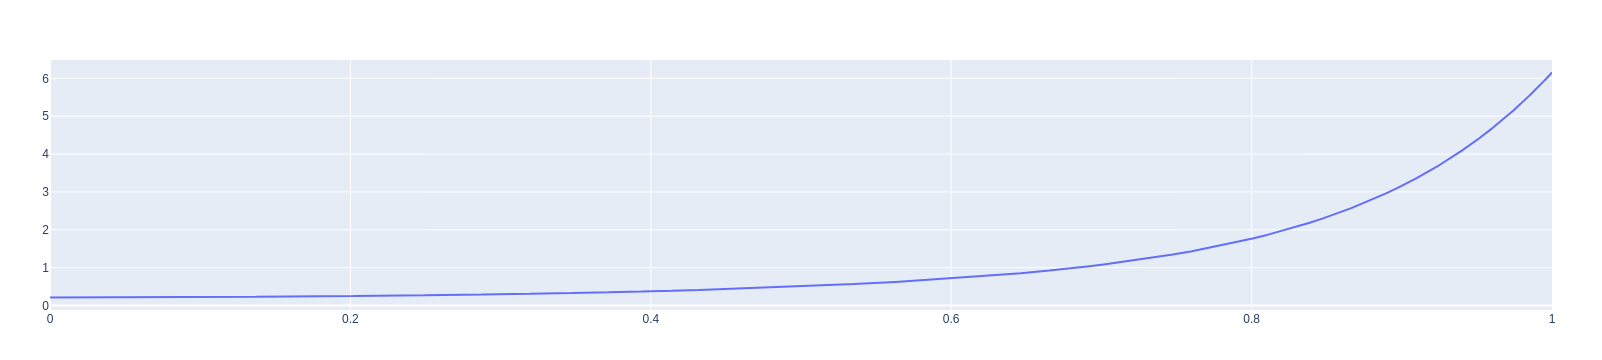

In [79]:
v = read_from_file()
    x = 0:0.0001:1
    y = map(x->poly_horner(v, x), x)

trace1 = scatter(x=x, y=y, 
                        mode="lines",
                        name="f")
display(plot([trace1]))

In [84]:
println(poly_horner([-5, -10, -15, -20,53.216453 ], 1.031415))
x=1.031415
-5x^4-10x^3-15x^2-20x+53.216453
open("cashflow.txt") do f
    s = read(f, String)
    s = split(s)
    vv::Vector{Float64} = parse.(Float64, s)
    ans, ok = newton(vv, 10., true)
    println("$ans, $ok")
end

function read_from_file()::Vector{Float64}
open("cashflow.txt") do f
    s = read(f, String)
    s = split(s)
    vv::Vector{Float64} = parse.(Float64, s)
    return vv
end
end


3.5724304581208344e-7
#:0, x:10.0, p:-2.920845875290866e13
#:1, x:9.30120380958422, p:-1.0345732694097865e13
#:2, x:8.652809614224001, p:-3.6641779596615303e12
#:3, x:8.051286902241033, p:-1.2976111785308274e12
#:4, x:7.493370796154453, p:-4.5946470715567316e11
#:5, x:6.97604656156561, p:-1.6266036277138278e11
#:6, x:6.49653638906017, p:-5.7571766308850006e10
#:7, x:6.0522887760083535, p:-2.0370559187317574e10
#:8, x:5.640971062127738, p:-7.204705506388955e9
#:9, x:5.260466036547406, p:-2.5467372986715937e9
#:10, x:4.908874135054939, p:-8.995209436483339e8
#:11, x:4.584523768178588, p:-3.173614677743926e8
#:12, x:4.28599410963938, p:-1.1178671104581128e8
#:13, x:4.012157892833553, p:-3.9278941340656415e7
#:14, x:3.7622576837226798, p:-1.3748500375275616e7
#:15, x:3.5360400854443106, p:-4.781786595793399e6
#:16, x:3.3339920931939373, p:-1.644684600038062e6
#:17, x:3.157753776558443, p:-553851.2333582762
#:18, x:3.0107900586254766, p:-178444.63293636704
#:19, x:2.899146979656132, p:-5181

read_from_file (generic function with 1 method)